<a href="https://colab.research.google.com/github/iyan-coder/gab/blob/main/Project_7_Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Car Price Prediction

##Import the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Importing the dataset

In [2]:
# loading the data from csv files to pandas DataFrame
dataset = pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv')


In [4]:
#inspecting the first 5 rows of the dataframe
dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
#checing the number of rows and columns
dataset.shape

(4340, 8)

In [6]:
#geting information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [7]:
#checking the misssing values
dataset.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [10]:
# checking the distribution of catagorical data
print(dataset.fuel.value_counts())
print(dataset.seller_type.value_counts())
print(dataset.transmission.value_counts())
print(dataset.owner.value_counts())


fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64
owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


##Encoding the Categorical Data

In [11]:
#encoding 'fuel' column
dataset.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)

#encoding 'seller_type' column
dataset.replace({'seller_type':{'Dealer':0,'Individual':1,'Trustmark Dealer':2}},inplace=True)

#encoding 'transmission' column
dataset.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)

#encoding 'owner' column
dataset.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)

In [12]:
dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,1,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,1,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,1,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,0,1


##Splitting the data and target

In [14]:
x = dataset.drop(['name','selling_price'],axis=1)
y = dataset['selling_price']

In [15]:
print(x)

      year  km_driven  fuel  seller_type  transmission  owner
0     2007      70000     0            1             0      0
1     2007      50000     0            1             0      0
2     2012     100000     1            1             0      0
3     2017      46000     0            1             0      0
4     2014     141000     1            1             0      1
...    ...        ...   ...          ...           ...    ...
4335  2014      80000     1            1             0      1
4336  2014      80000     1            1             0      1
4337  2009      83000     0            1             0      1
4338  2016      90000     1            1             0      0
4339  2016      40000     0            1             0      0

[4340 rows x 6 columns]


In [16]:
print(y)

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


##Splitting training and test data

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state=2)

In [18]:
print(x.shape, x_train.shape, x_test.shape)

(4340, 6) (3906, 6) (434, 6)


##Training the Model

In [54]:
# loading the linear regression model
# from sklearn.tree import DecisionTreeRegressor
# model = DecisionTreeRegressor(random_state = 0, max_depth=10)
# model.fit(x, y)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=0, n_estimators=100)
model.fit(x, y)


RandomForestRegressor(random_state=0)

##Model Evaluation

In [55]:
# predicting the training data
from sklearn.metrics import r2_score
training_data_prediction = model.predict(x_train)
error_score = r2_score(y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9140982305337714


In [57]:
# predicting the test data
from sklearn.metrics import r2_score
test_data_prediction = model.predict(x_test)
error_score = r2_score(y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9392055879427569


##Visualize the actual prices and Predicted prices

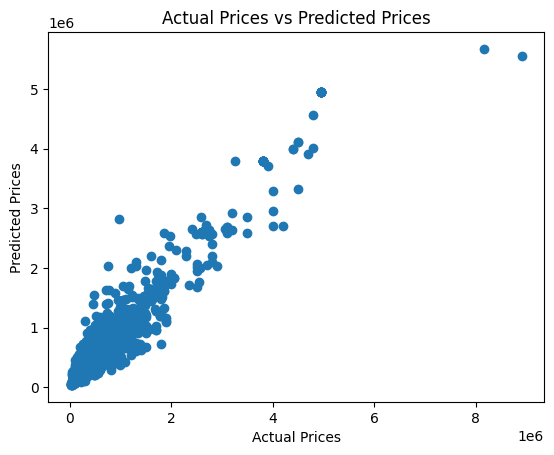

In [58]:
#visualizing using the training set
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

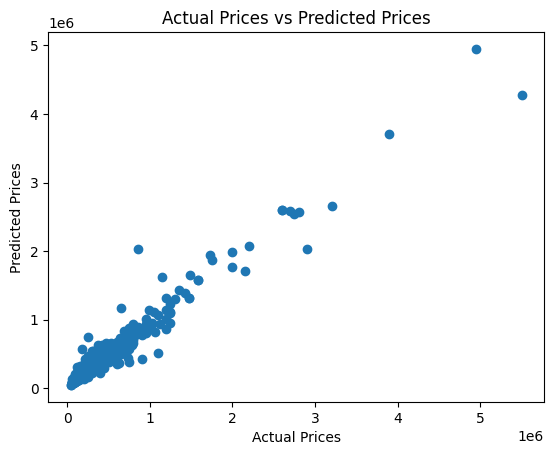

In [59]:
# visualizing using test dataset
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()